# Full Code

In [131]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.decomposition import NMF, PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

X, y = load_digits(return_X_y=True)

pipe = Pipeline(
    [
        ("scaling", MinMaxScaler()),
        ("reduce_dim", "passthrough"), # the reduce_dim stage is populated by the param_grid
        ("classify", LinearSVC(dual=False, max_iter=10000)),
    ]
)

N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        "reduce_dim": [PCA(iterated_power=7), NMF(max_iter=1_000)],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
    {
        "reduce_dim": [SelectKBest(mutual_info_classif)],
        "reduce_dim__k": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
]
reducer_labels = ["PCA", "NMF", "KBest(mutual_info_classif)"]

grid = GridSearchCV(pipe, n_jobs=-1, param_grid=param_grid)
grid.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('scaling', MinMaxScaler()),
                                       ('reduce_dim', 'passthrough'),
                                       ('classify',
                                        LinearSVC(dual=False,
                                                  max_iter=10000))]),
             n_jobs=-1,
             param_grid=[{'classify__C': [1, 10, 100, 1000],
                          'reduce_dim': [PCA(iterated_power=7),
                                         NMF(max_iter=1000)],
                          'reduce_dim__n_components': [2, 4, 8]},
                         {'classify__C': [1, 10, 100, 1000],
                          'reduce_dim': [SelectKBest(score_func=<function mutual_info_classif at 0x000002166195D3F0>)],
                          'reduce_dim__k': [2, 4, 8]}])

## Visualize

In [132]:
import pandas as pd

mean_scores = np.array(grid.cv_results_["mean_test_score"])
# mean_scores
grid_dataframe = pd.DataFrame(grid.cv_results_)
grid_dataframe

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classify__C,param_reduce_dim,param_reduce_dim__n_components,param_reduce_dim__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007602,0.000800,0.001200,4.001141e-04,1,PCA(iterated_power=7),2.0,NaN,"{'classify__C': 1, 'reduce_dim': PCA(iterated_...",0.516667,0.558333,0.532033,0.520891,0.451253,0.515836,0.035399,26
1,0.009802,0.000748,0.001601,4.900766e-04,1,PCA(iterated_power=7),4.0,NaN,"{'classify__C': 1, 'reduce_dim': PCA(iterated_...",0.750000,0.725000,0.771588,0.779944,0.715877,0.748482,0.025062,9
2,0.013003,0.001414,0.001800,3.999472e-04,1,PCA(iterated_power=7),8.0,NaN,"{'classify__C': 1, 'reduce_dim': PCA(iterated_...",0.850000,0.819444,0.860724,0.930362,0.827298,0.857566,0.039334,1
3,0.052411,0.011692,0.002600,4.902131e-04,1,NMF(max_iter=1000),2.0,NaN,"{'classify__C': 1, 'reduce_dim': NMF(max_iter=...",0.344444,0.288889,0.300836,0.342618,0.272981,0.309954,0.028811,35
4,0.093221,0.043245,0.002200,4.004243e-04,1,NMF(max_iter=1000),4.0,NaN,"{'classify__C': 1, 'reduce_dim': NMF(max_iter=...",0.641667,0.619444,0.671309,0.643454,0.626741,0.640523,0.017843,20
5,0.130229,0.022009,0.002401,4.900183e-04,1,NMF(max_iter=1000),8.0,NaN,"{'classify__C': 1, 'reduce_dim': NMF(max_iter=...",0.747222,0.741667,0.821727,0.857939,0.752089,0.784129,0.047017,8
6,0.007001,0.000633,0.001200,4.001618e-04,10,PCA(iterated_power=7),2.0,NaN,"{'classify__C': 10, 'reduce_dim': PCA(iterated...",0.522222,0.555556,0.529248,0.526462,0.462396,0.519177,0.030696,23
7,0.009202,0.001470,0.001400,4.897655e-04,10,PCA(iterated_power=7),4.0,NaN,"{'classify__C': 10, 'reduce_dim': PCA(iterated...",0.752778,0.716667,0.766017,0.782730,0.713092,0.746257,0.027345,10
8,0.013003,0.001674,0.001400,4.901545e-04,10,PCA(iterated_power=7),8.0,NaN,"{'classify__C': 10, 'reduce_dim': PCA(iterated...",0.852778,0.813889,0.857939,0.922006,0.818942,0.853110,0.038667,2
9,0.052811,0.016145,0.001800,7.484302e-04,10,NMF(max_iter=1000),2.0,NaN,"{'classify__C': 10, 'reduce_dim': NMF(max_iter...",0.350000,0.291667,0.323120,0.350975,0.295265,0.322205,0.025532,33


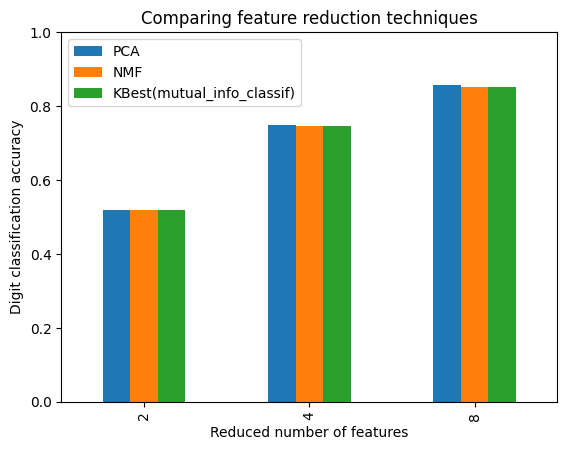

In [133]:
import pandas as pd

mean_scores = np.array(grid.cv_results_["mean_test_score"])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
# create a dataframe to ease plotting
mean_scores = pd.DataFrame(
    mean_scores.T, index=N_FEATURES_OPTIONS, columns=reducer_labels
)

ax = mean_scores.plot.bar()
ax.set_title("Comparing feature reduction techniques")
ax.set_xlabel("Reduced number of features")
ax.set_ylabel("Digit classification accuracy")
ax.set_ylim((0, 1))
ax.legend(loc="upper left")

plt.show()

In [134]:
mean_scores

,PCA,NMF,KBest(mutual_info_classif)
2,0.519177,0.519177,0.519177
4,0.748482,0.746257,0.746257
8,0.857566,0.851998,0.853110


---

# Walkthrough

# Load the Dataset

In [135]:
X, y = load_digits(return_X_y=True)

- load_digits(return_X_y=True): Loads the digits dataset. return_X_y=True means it returns the data as two separate variables:
- X: The feature matrix (pixel values of the digit images).
- y: The target vector (the actual digit labels, 0-9).

# Create a Pipeline:



In [136]:
pipe = Pipeline(
    [
        ("scaling", MinMaxScaler()),
        ("reduce_dim", "passthrough"),
        ("classify", LinearSVC(dual=False, max_iter=10000)),
    ]
)

This code defines a machine learning pipeline in scikit-learn (sklearn). Pipelines are a powerful way to chain together multiple processing steps, ensuring the same transformations are applied during both training and prediction.

Here's a breakdown of the pipeline:

`Pipeline(...)`:  This creates the pipeline object that will hold and organize the steps.

The pipeline has three steps:

1.  **`("scaling", MinMaxScaler())`**:
    *   `"scaling"`: This is simply a name for this step in the pipeline.
    *   `MinMaxScaler()`: This scales the features to a specific range (usually 0 to 1). This is important for many algorithms that are sensitive to the scale of different features.

2.  **`("reduce_dim", "passthrough")`**:
    *   `"reduce_dim"`:  Another name for the step, indicating its purpose.
    *   `"passthrough"`: This is a placeholder! It means this step currently does nothing. Later, tools like `GridSearchCV` will replace `"passthrough"` with different dimensionality reduction methods (like PCA, NMF, or SelectKBest) to find the best one.

3.  **`("classify", LinearSVC(dual=False, max_iter=10000))`**:
    *   `"classify"`: The name of the final classification step.
    *   `LinearSVC(dual=False, max_iter=10000)`: This is a linear Support Vector Machine (SVM) classifier.
        *   `dual=False`:  This setting is preferred when you have more samples than features.
        *   `max_iter=10000`:  This sets the maximum number of iterations the algorithm will run to try and find a solution.

## is it mandatory for Pipeline() to use names, ie, 'scaling', 'reduce_dim','classify' ?

Yes, it is mandatory to use names for each step in the Pipeline constructor. The Pipeline requires every step to have a unique name so that it can identify, reference, and manage the individual steps during operations like fitting, transforming, and hyperparameter tuning.

**Identification:**

*   The names allow `Pipeline` to identify each step uniquely.
*   For example, in `GridSearchCV`, you can specify hyperparameters like `classify__C` or `reduce_dim__n_components`.

**Order Management:**

*   Steps in the `Pipeline` are executed sequentially based on the order in the list, and the names keep the sequence clear.

**Hyperparameter Access:**

*   Without names, it would be impossible to set or tune specific hyperparameters for steps using tools like `GridSearchCV`.

example without names, INVALID

In [137]:
pipe = Pipeline([
    MinMaxScaler(),
    "passthrough",
    LinearSVC(dual=False, max_iter=10000),
])


Example with names, VALID

In [138]:
pipe = Pipeline([
    ("scaling", MinMaxScaler()),
    ("reduce_dim", "passthrough"),
    ("classify", LinearSVC(dual=False, max_iter=10000)),
])


## so then later, when the param_grid variable is created, it is mandatory for the the keys in the dictionary to match the names created in the pipeline?

Yes, the keys in the param_grid dictionary must match the names defined in the Pipeline. This ensures that GridSearchCV can correctly map the hyperparameters in param_grid to the corresponding steps in the pipeline.

**Parameter Mapping:**

*   The pipeline assigns each step a name (e.g., `scaling`, `reduce_dim`, `classify`).
*   When specifying hyperparameters in `param_grid`, the keys are used to map the hyperparameters to their respective pipeline steps.

**Convention:**

*   The keys follow the format: `step_name__parameter_name`
*   where `step_name` is the name of the pipeline step, and `parameter_name` is the name of the parameter for that specific transformer or estimator.

Example:

In [139]:
pipe = Pipeline([
    ("scaling", MinMaxScaler()),
    ("reduce_dim", "passthrough"),
    ("classify", LinearSVC(dual=False, max_iter=10000)),
])

param_grid = [
    {
        "reduce_dim": [PCA(), NMF()],
        "reduce_dim__n_components": [2, 4, 8],  # Parameter for the "reduce_dim" step
        "classify__C": [1, 10, 100],           # Parameter for the "classify" step
    },
    {
        "reduce_dim": [SelectKBest(mutual_info_classif)],
        "reduce_dim__k": [2, 4, 8],           # Parameter for the "reduce_dim" step
        "classify__C": [1, 10, 100],          # Parameter for the "classify" step
    },
]


*   **`reduce_dim` and `classify`**: These match the names assigned to the respective pipeline steps.
*   **Double Underscore (`__`)**: Used to separate the step name (`reduce_dim`) from the parameter name (`n_components`, `k`, `C`, etc.).

If you don't follow this convention, `GridSearchCV` will raise an error because it won't know where to apply the specified hyperparameters.

**What Happens Internally?**

When you pass the pipeline and `param_grid` to `GridSearchCV`, it:

1.  Looks for the steps in the pipeline by their names (e.g., `reduce_dim`, `classify`).
2.  Applies the specified parameters (e.g., `n_components`, `C`, etc.) to the corresponding objects in those steps.

---

# Define Hyperparameter Options:

In [140]:
N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]

**`N_FEATURES_OPTIONS`**: A list of options for the number of components/features to keep after dimensionality reduction.

**`C_OPTIONS`**: A list of options for the regularization parameter `C` of the `LinearSVC` classifier. `C` controls the trade-off between maximizing the margin and minimizing the classification error.

# Define the Parameter Grid:



In [141]:
param_grid = [
    {
        "reduce_dim": [PCA(iterated_power=7), NMF(max_iter=1_000)],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
    {
        "reduce_dim": [SelectKBest(mutual_info_classif)],
        "reduce_dim__k": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
]

**`param_grid`**: This is a list of dictionaries. Each dictionary defines a set of hyperparameter combinations to try. This setup allows `GridSearchCV` to explore different dimensionality reduction methods and their associated hyperparameters.

*   **First dictionary (PCA and NMF):**
    *   `"reduce_dim"`: `[PCA(iterated_power=7), NMF(max_iter=1000)]`: `GridSearchCV` will try both `PCA` and `NMF` for dimensionality reduction.
        *   `PCA(iterated_power=7)` is configured to improve the accuracy of results.
        *   `NMF(max_iter=1000)` is configured to prevent non-convergence warnings.
    *   `"reduce_dim__n_components"`: `N_FEATURES_OPTIONS`: For both `PCA` and `NMF`, it will try setting the number of components to 2, 4, and 8. The `__` is used to access the hyperparameters of a specific step in the pipeline.
    *   `"classify__C"`: `C_OPTIONS`: It will try different values of `C` for the `LinearSVC` classifier (1, 10, 100, 1000).

*   **Second dictionary (SelectKBest):**
    *   `"reduce_dim"`: `[SelectKBest(mutual_info_classif)]`: `GridSearchCV` will use `SelectKBest` with `mutual_info_classif` as the scoring function. `SelectKBest` selects the top `k` features that are most informative for classification.
    *   `"reduce_dim__k"`: `N_FEATURES_OPTIONS`: It will try selecting the top 2, 4, and 8 features.
    *   `"classify__C"`: `C_OPTIONS`: Same as before, it will try different values of `C` for the classifier.

# Define Reducer Labels:



In [142]:
reducer_labels = ["PCA", "NMF", "KBest(mutual_info_classif)"]

**`reducer_labels`**: This list just provides human-readable names for the dimensionality reduction methods. It's used later for visualization purposes.

# Create and Run GridSearchCV:

In [143]:
grid = GridSearchCV(pipe, n_jobs=-1, param_grid=param_grid)
grid.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('scaling', MinMaxScaler()),
                                       ('reduce_dim', 'passthrough'),
                                       ('classify',
                                        LinearSVC(dual=False,
                                                  max_iter=10000))]),
             n_jobs=-1,
             param_grid=[{'classify__C': [1, 10, 100, 1000],
                          'reduce_dim': [PCA(iterated_power=7),
                                         NMF(max_iter=1000)],
                          'reduce_dim__n_components': [2, 4, 8]},
                         {'classify__C': [1, 10, 100, 1000],
                          'reduce_dim': [SelectKBest(score_func=<function mutual_info_classif at 0x000002166195D3F0>)],
                          'reduce_dim__k': [2, 4, 8]}])

`grid = GridSearchCV(pipe, n_jobs=1, param_grid=param_grid)`:

*   `GridSearchCV(...)`: Creates a `GridSearchCV` object.
    *   `pipe`: The pipeline you created earlier is passed as the estimator. `GridSearchCV` will train and evaluate this pipeline with different hyperparameter combinations.
    *   `n_jobs=1`: This means use only 1 CPU core. You can change this to `-1` to use all available cores and speed up the process if you have a multi-core processor.
    *   `param_grid`: The parameter grid you defined to specify which hyperparameters to search.

`grid.fit(X, y)`: This is where the magic happens! `GridSearchCV` does the following:

1.  **Cross-Validation**: It splits the data into multiple folds (by default, 5-fold cross-validation).
2.  **Training and Evaluation**: For each combination of hyperparameters in `param_grid`, it trains the pipeline on some folds and evaluates its performance on the remaining fold.
3.  **Best Model Selection**: It keeps track of the hyperparameter combination that yields the best average performance across all folds (e.g., highest accuracy).
4.  **Refitting**: Finally, it refits the pipeline with the best hyperparameters found on the entire dataset (`X`, `y`).

In essence, the code automates the process of trying out different preprocessing and model configurations to find the one that works best for your data and task.

# Follow-up Question 1: Why Use "passthrough" in the Pipeline?

In [144]:
pipe = Pipeline(
    [
        ("scaling", MinMaxScaler()),
        ("reduce_dim", "passthrough"),
        ("classify", LinearSVC(dual=False, max_iter=10000)),
    ]
)

**Why did we passthrough "reduce_dim"; couldn't we just input the "reduce_dim" options from the `param_grid` variable here, or not?**

You're right to question the use of `"passthrough"` in the `reduce_dim` step. It might seem like we could directly put the dimensionality reduction methods there. However, there are a couple of key reasons why `"passthrough"` is used as a placeholder in this scenario:

**1. `GridSearchCV` Needs a Fixed Pipeline Structure:**

*   `GridSearchCV` works by trying out different combinations of hyperparameters within a predefined pipeline structure. The *structure* of the pipeline itself (i.e., the number and types of steps) needs to remain consistent across all iterations of the grid search.
*   If we were to directly insert the dimensionality reduction methods (PCA, NMF, SelectKBest) into the pipeline definition, we would be changing the pipeline's structure itself within the `param_grid`. `GridSearchCV` is not designed to handle changes to the fundamental structure of the pipeline during the search process.

**2. Flexibility to Include or Exclude Dimensionality Reduction:**

*   Using `"passthrough"` allows us to effectively turn the dimensionality reduction step "on" or "off" during the grid search.
    *   When `"passthrough"` is used, no dimensionality reduction is performed.
    *   When `GridSearchCV` replaces `"passthrough"` with PCA, NMF, or SelectKBest, the dimensionality reduction is active.
*   This gives us the option to see how the classifier performs *without* any dimensionality reduction as well, which can be a useful baseline comparison.

**3. Different Dimensionality Reducers Have Different Hyperparameters:**

*   PCA, NMF, and SelectKBest have different hyperparameters (e.g., `n_components` for PCA/NMF, `k` for SelectKBest).
*   If we embedded them directly into the pipeline, it would be difficult to specify different hyperparameter options for each method within `param_grid`. `GridSearchCV` would have a harder time figuring out which hyperparameter belongs to which method.
*   By using `"passthrough"` and letting `GridSearchCV` substitute the actual methods, we can cleanly associate the correct hyperparameters with each method in the `param_grid` (using `"reduce_dim__n_components"` or `"reduce_dim__k"`).

**In Summary:**

The `"passthrough"` placeholder acts as a switch to enable or disable the dimensionality reduction step while maintaining a fixed pipeline structure that `GridSearchCV` can work with. It also helps organize the hyperparameters associated with different dimensionality reduction methods in a clear and manageable way within the `param_grid`.

It's a bit like having a modular setup where you can easily swap out different components (dimensionality reduction methods) without having to rewire the entire system.

# Follow-up Question 2: Cross-Validation and Different param_grid Dictionaries

In [145]:
param_grid = [
    {
        "reduce_dim": [PCA(iterated_power=7), NMF(max_iter=1_000)],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
    {
        "reduce_dim": [SelectKBest(mutual_info_classif)],
        "reduce_dim__k": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
]

**Is the line `"reduce_dim": [PCA(iterated_power=7), NMF(max_iter=1_000)]` doing PCA and NMF for the same 5 folds of training, and afterwards select k best is doing another 5 folds? Or is it doing PCA in 5 of the folds, NMF in another 5 folds, and select k best in another 5 folds?**

That's a great question about how `GridSearchCV` handles the different dimensionality reduction methods within the cross-validation process.

Here's how it works:

1.  `GridSearchCV` treats each *combination* of hyperparameters in `param_grid` as an **independent experiment**.
2.  In your `param_grid`, you have two dictionaries:

In [146]:
# PCA and NMF
{
    "reduce_dim": [PCA(iterated_power=7), NMF(max_iter=1_000)],
    "reduce_dim__n_components": N_FEATURES_OPTIONS,
    "classify__C": C_OPTIONS,
}

{'reduce_dim': [PCA(iterated_power=7), NMF(max_iter=1000)],
 'reduce_dim__n_components': [2, 4, 8],
 'classify__C': [1, 10, 100, 1000]}

In [147]:
# SelectKBest
{
    "reduce_dim": [SelectKBest(mutual_info_classif)],
    "reduce_dim__k": N_FEATURES_OPTIONS,
    "classify__C": C_OPTIONS,
}

{'reduce_dim': [SelectKBest(score_func=<function mutual_info_classif at 0x000002166195D3F0>)],
 'reduce_dim__k': [2, 4, 8],
 'classify__C': [1, 10, 100, 1000]}

`GridSearchCV` will perform separate cross-validation for each of these dictionaries *and* the combinations within them.

Let me break it down further:

**For the first dictionary (PCA and NMF):**

1.  `GridSearchCV` will perform a 5-fold cross-validation (assuming the default `cv=5`).
2.  For **each fold**, it will:
    *   Try `PCA` with `n_components` set to 2, then 4, then 8, and for each of those, it will try all the `C` values in `C_OPTIONS`.
    *   Try `NMF` with `n_components` set to 2, then 4, then 8, and for each of those, it will try all the `C` values in `C_OPTIONS`.
    *   **This part is doing PCA and NMF on the same folds.** It tests PCA, then it tests NMF *on the same fold*, in order to have a fair comparison between PCA and NMF.
3.  It will then average the performance scores (e.g., accuracy) across the 5 folds for each combination of `reduce_dim`, `n_components`, and `C`.

**For the second dictionary (SelectKBest):**

1.  `GridSearchCV` will perform another, **independent** 5-fold cross-validation.
2.  For **each fold**, it will:
    *   Try `SelectKBest` with `k` set to 2, then 4, then 8, and for each of those, it will try all the `C` values in `C_OPTIONS`.
3.  Again, it will average the performance scores across the 5 folds for each combination of `k` and `C`.

**In essence:**

*   **PCA and NMF are evaluated together using the same set of 5 folds in one set of cross-validation runs.**
*   **SelectKBest is evaluated in a separate set of 5-fold cross-validation runs.**

**Why this approach (continued)?**

*   **Fair Comparison:** By evaluating PCA and NMF on the same folds, `GridSearchCV` ensures a fair comparison between them. Any differences in performance are more likely due to the methods themselves rather than differences in the data used for training and testing in each fold.
*   **Independence:** Treating the `SelectKBest` dictionary separately makes sense because it uses a fundamentally different feature selection approach compared to PCA and NMF. There's no need for a direct fold-by-fold comparison with PCA/NMF.

**Key takeaway:** Each dictionary in `param_grid` triggers its own independent cross-validation process, and within each dictionary, different hyperparameter combinations are compared using the same folds to ensure fairness.

# Follow-up Question 3: Combining Everything into a Single Dictionary in param_grid


User: Thanks for explaining, that makes sense! But if one wanted to, could the param_grid variable just have been one dictionary like so? And it would be essentially the same thing, other than now SelectKBest was also tested in the same 5 folds?

In [148]:
param_grid = [
    {
        "reduce_dim": [PCA(iterated_power=7), NMF(max_iter=1_000), SelectKBest(mutual_info_classif)],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    }
]

You're almost right, but there's a subtle but important difference in how `GridSearchCV` would interpret that single dictionary `param_grid` and how `SelectKBest` works with hyperparameters.

Let's break it down:

**What would happen with your proposed `param_grid`:**

In [149]:
param_grid = [
    {
        "reduce_dim": [PCA(iterated_power=7), NMF(max_iter=1_000), SelectKBest(mutual_info_classif)],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    }
]

`GridSearchCV` would still treat each combination as a separate experiment. It would iterate through all combinations of:

*   `reduce_dim`: PCA, NMF, and then SelectKBest
*   `reduce_dim__n_components`: 2, 4, and 8
*   `classify__C`: 1, 10, 100, 1000

**The problem is with `reduce_dim__n_components` and `SelectKBest`.**

*   PCA and NMF use the `n_components` hyperparameter to determine the number of components to extract.
*   `SelectKBest` uses a hyperparameter named `k` to determine the number of top features to select. **It does not have an `n_components` hyperparameter.**

**Consequences:**

When `GridSearchCV` gets to `SelectKBest`, it will try to set `reduce_dim__n_components` for `SelectKBest`, but `SelectKBest` will not understand what to do with `n_components`. This will likely raise an error or cause unexpected behavior because you're trying to apply a hyperparameter that doesn't exist for that particular method.

It would **not** do what we want, which is to have `"reduce_dim__k"` apply to `SelectKBest`, and have `"reduce_dim__n_components"` apply to PCA and NMF.
